# Data Preprocessing & Visualization

In [62]:
# Import labraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Current working directory

os.getcwd()

'c:\\Users\\Admin\\Documents\\Apziva_Projects'

In [64]:
# Loading the dataset

df = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [65]:
df.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [66]:
df.tail(5)

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


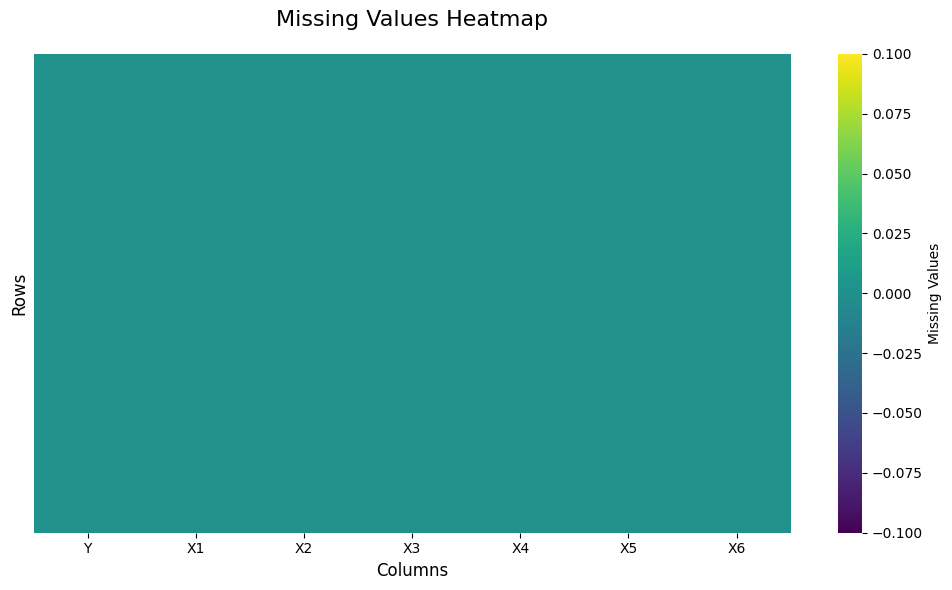

Missing Values Summary:
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


In [68]:
# Checking  NaN values


# Create heatmap of NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), 
            cbar=True,
            yticklabels=False,  # Hide row labels for cleaner look
            cmap='viridis',     # Color scheme
            cbar_kws={'label': 'Missing Values'})

plt.title('Missing Values Heatmap', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Missing Values Summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")




The dataset doesn't contain any missing or empty value

STARTING OUTLIERS ANALYSIS...


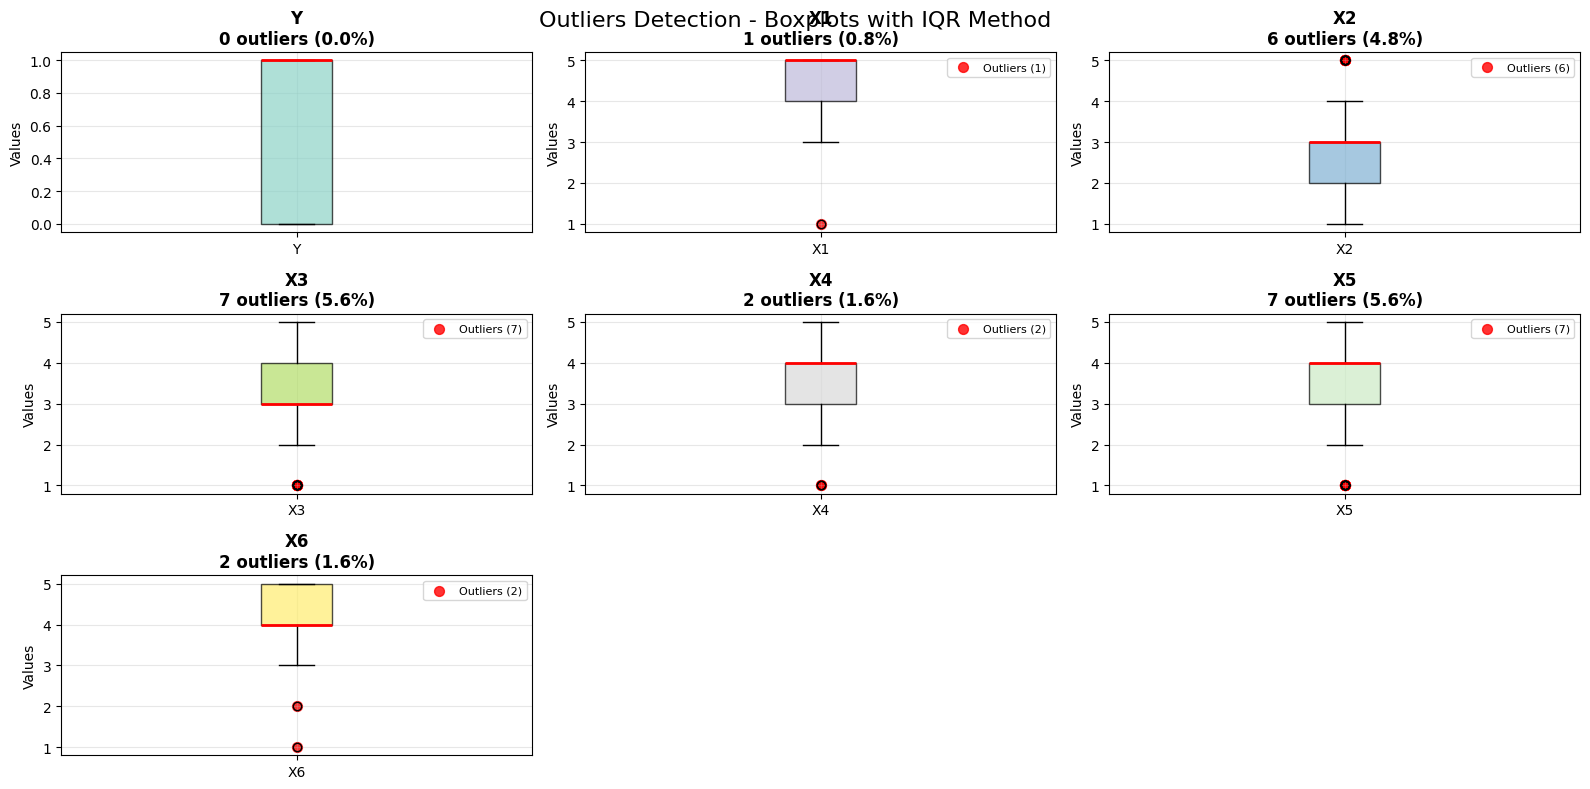

OUTLIERS DETECTION SUMMARY (IQR Method)

GLOBAL STATISTICS:
   - Total outliers detected: 25
   - Variables analyzed: 7

DETAILS BY VARIABLE:
------------------------------------------------------------

Y:
   - Outliers: 0 (0.00%)
   - IQR thresholds: [-1.500, 2.500]
   - Q1: 0.000 | Q3: 1.000 | IQR: 1.000
   CLEAN: No outliers detected!

X1:
   - Outliers: 1 (0.79%)
   - IQR thresholds: [2.500, 6.500]
   - Q1: 4.000 | Q3: 5.000 | IQR: 1.000
   - Most extreme values: ['1.000']
   OK: Acceptable outlier rate (0.8%)

X2:
   - Outliers: 6 (4.76%)
   - IQR thresholds: [0.500, 4.500]
   - Q1: 2.000 | Q3: 3.000 | IQR: 1.000
   - Most extreme values: ['5.000', '5.000', '5.000']
   OK: Acceptable outlier rate (4.8%)

X3:
   - Outliers: 7 (5.56%)
   - IQR thresholds: [1.500, 5.500]
   - Q1: 3.000 | Q3: 4.000 | IQR: 1.000
   - Most extreme values: ['1.000', '1.000', '1.000']
   MODERATE: Moderate outlier rate (5.6%)

X4:
   - Outliers: 2 (1.59%)
   - IQR thresholds: [1.500, 5.500]
   - Q1: 3.00

In [69]:
# Checking Outliers


from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')


def detect_outliers_iqr(df, columns=None, visualize=True, figsize=(16, 8)):
    """
    Detects outliers using the IQR method for each variable with boxplot visualization
    
    Parameters:
    -----------
    df : DataFrame
        The dataset to analyze
    columns : list, optional
        List of columns to analyze (default: all numeric columns)
    visualize : bool, default=True
        If True, displays boxplots
    figsize : tuple, default=(16, 8)
        Figure size
    
    Returns:
    --------
    outliers_dict : dict
        Dictionary with outlier information for each variable
    outliers_indices : list
        List of indices of all detected outliers
    """
    
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    outliers_dict = {}
    outliers_indices = set()
    
    # Outlier detection
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'indices': outliers.index.tolist(),
            'values': outliers[col].tolist(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }
        
        # Add indices to global set
        outliers_indices.update(outliers.index.tolist())
    
    # Visualization
    if visualize:
        create_boxplot_visualization(df, columns, outliers_dict, figsize)
    
    return outliers_dict, list(outliers_indices)

def create_boxplot_visualization(df, columns, outliers_dict, figsize):
    """
    Creates boxplots with highlighted outliers
    """
    n_cols = len(columns)
    n_rows = (n_cols + 2) // 3  # 3 columns per row
    
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    colors = plt.cm.Set3(np.linspace(0, 1, n_cols))
    
    for i, col in enumerate(columns):
        if i < len(axes):
            ax = axes[i]
            
            # Create boxplot
            bp = ax.boxplot(df[col].dropna(), patch_artist=True, 
                           boxprops=dict(facecolor=colors[i], alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
            
            # Add outliers with different colors
            outliers_info = outliers_dict[col]
            if outliers_info['count'] > 0:
                outlier_values = outliers_info['values']
                ax.scatter([1] * len(outlier_values), outlier_values, 
                          color='red', s=50, alpha=0.8, marker='o', 
                          label=f'Outliers ({outliers_info["count"]})')
            
            # Customization
            ax.set_title(f'{col}\n{outliers_info["count"]} outliers ({outliers_info["percentage"]:.1f}%)', 
                        fontsize=12, fontweight='bold')
            ax.set_ylabel('Values')
            ax.grid(True, alpha=0.3)
            ax.set_xticklabels([col])
            
            if outliers_info['count'] > 0:
                ax.legend(loc='upper right', fontsize=8)
    
    # Hide unused axes
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Outliers Detection - Boxplots with IQR Method', fontsize=16, y=0.98)
    plt.show()

def print_outliers_summary(outliers_dict):
    """
    Displays a detailed summary of detected outliers
    """
    print("=" * 60)
    print("OUTLIERS DETECTION SUMMARY (IQR Method)")
    print("=" * 60)
    
    total_outliers = sum([info['count'] for info in outliers_dict.values()])
    print(f"\nGLOBAL STATISTICS:")
    print(f"   - Total outliers detected: {total_outliers}")
    print(f"   - Variables analyzed: {len(outliers_dict)}")
    
    print(f"\nDETAILS BY VARIABLE:")
    print("-" * 60)
    
    for col, info in outliers_dict.items():
        print(f"\n{col.upper()}:")
        print(f"   - Outliers: {info['count']} ({info['percentage']:.2f}%)")
        print(f"   - IQR thresholds: [{info['lower_bound']:.3f}, {info['upper_bound']:.3f}]")
        print(f"   - Q1: {info['Q1']:.3f} | Q3: {info['Q3']:.3f} | IQR: {info['IQR']:.3f}")
        
        if info['count'] > 0:
            extreme_values = sorted(info['values'], key=abs, reverse=True)[:3]
            print(f"   - Most extreme values: {[f'{v:.3f}' for v in extreme_values]}")
        
        # Contamination level assessment
        if info['percentage'] > 10:
            print(f"   WARNING: High outlier rate ({info['percentage']:.1f}%)")
        elif info['percentage'] > 5:
            print(f"   MODERATE: Moderate outlier rate ({info['percentage']:.1f}%)")
        elif info['count'] > 0:
            print(f"   OK: Acceptable outlier rate ({info['percentage']:.1f}%)")
        else:
            print(f"   CLEAN: No outliers detected!")
    
    print("\n" + "=" * 60)

def analyze_outliers_complete(df, columns=None, show_summary=True):
    """
    Complete outliers analysis with boxplot visualization
    """
    print("STARTING OUTLIERS ANALYSIS...")
    
    # Detection with boxplot visualization
    outliers_info, all_outliers_indices = detect_outliers_iqr(
        df, columns=columns, visualize=True
    )
    
    # Display summary
    if show_summary:
        print_outliers_summary(outliers_info)
    
    # Recommendations
    total_outliers_pct = len(all_outliers_indices) / len(df) * 100
    
    print(f"\nRECOMMENDATIONS:")
    if total_outliers_pct > 15:
        print("   HIGH: Very high outlier rate - Check data quality")
    elif total_outliers_pct > 10:
        print("   MODERATE: High outlier rate - Examine causes")
    elif total_outliers_pct > 5:
        print("   NORMAL: Normal outlier rate - Analyze case by case")
    else:
        print("   EXCELLENT: Very good dataset quality")
    
    return outliers_info, all_outliers_indices



    
    # Run complete analysis
outliers_info, outliers_indices = analyze_outliers_complete(df)

The number of outliers in the dataset is negligible. Therefore, we may use StandardScaler instead of RobustScaler for standardization, as it is more efficient and better suited for normally distributed data with minimal outliers.

In [70]:
# Separate independant variables and the targert variable

X = df.drop('Y', axis = 1)
y = df["Y"]

In [71]:
X

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [72]:
y

0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64

In [73]:
y.value_counts()

Y
1    69
0    57
Name: count, dtype: int64

The classes in the dataset are almost balanced, meaning each target category has a similar number of observations. This ensures that the model will not be biased toward a majority class and can generalize well across all categories.

In [74]:
# Linear correlation between variables

X.corr()

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


The linear correlation between variables is generally weak. This suggests that each variable contributes independent information to the model, reducing multicollinearity risks and potentially improving estimator performance.

# Data Modeling

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

def compare_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Standardizes data, splits into train/test, trains 3 models and returns accuracy scores
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    accuracy_scores : dict
        Dictionary containing test accuracy for each model
    """
    
    # Convert to numpy arrays if needed
    if hasattr(X, 'values'):
        X = X.values
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models with default parameters
    models = {
        'Logistic_Regression': LogisticRegression(random_state=random_state),
        'Random_Forest': RandomForestClassifier(random_state=random_state),
        'XGBoost': xgb.XGBClassifier(random_state=random_state)
    }
    
    # Train models and calculate accuracy
    accuracy_scores = {}
    
    for model_name, model in models.items():
        if model_name == 'Logistic_Regression':
            # Use scaled data for Logistic Regression
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            # Use the tree-based models
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        
        accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    
    return accuracy_scores



In [76]:
accuracy_scores = compare_classification_models(X, y, test_size=0.2, random_state=42)

In [77]:
accuracy_scores

{'Logistic_Regression': 0.6153846153846154,
 'Random_Forest': 0.6538461538461539,
 'XGBoost': 0.46153846153846156}

Among the three default models (Logistic Regression, Random Forest, and XGBoost), Random Forest demonstrates the highest accuracy. We will now focus on optimizing this model through hyperparameter tuning and feature engineering.

# Model Optimisation

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def optimize_random_forest_pipeline(X, y, feature_names=None, test_size=0.2, random_state=42, plot_importance=True):
    """
    Creates pipeline for RandomForest with GridSearchCV optimization and feature importance visualization
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    feature_names : list, optional
        Names of features for visualization
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    plot_importance : bool, default=True
        Whether to plot feature importance
    
    Returns:
    --------
    results : dict
        Dictionary containing accuracy score and feature importance
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Create pipeline for RandomForest
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])
    
    # Parameter grid for GridSearchCV
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
    
    # GridSearchCV optimization
    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Fit and get best model
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Extract feature importance from the trained RandomForest
    rf_model = best_model.named_steps['classifier']
    feature_importance = rf_model.feature_importances_
    
    # Create feature importance dictionary
    importance_dict = {
        'feature_names': feature_names,
        'importance_scores': feature_importance,
        'importance_percentage': (feature_importance / feature_importance.sum()) * 100
    }
    
    # Sort by importance
    importance_indices = np.argsort(feature_importance)[::-1]
    sorted_features = [feature_names[i] for i in importance_indices]
    sorted_importance = feature_importance[importance_indices]
    sorted_percentage = (sorted_importance / sorted_importance.sum()) * 100
    
    # Print optimization results
    print("RANDOM FOREST OPTIMIZATION RESULTS")
    print("=" * 45)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    print(f"\nTOP 10 FEATURE IMPORTANCE:")
    print("-" * 45)
    for i in range(min(10, len(sorted_features))):
        print(f"{i+1:2d}. {sorted_features[i]:<20} {sorted_percentage[i]:6.2f}%")
    
    # Plot feature importance
    if plot_importance:
        plot_feature_importance(sorted_features, sorted_percentage, top_n=15)
    
    # Prepare results
    results = {
        'accuracy': test_accuracy,
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'feature_importance': importance_dict,
        'model': best_model
    }
    
    return results

def plot_feature_importance(feature_names, importance_scores, top_n=15, figsize=(12, 8)):
    """
    Plots feature importance for RandomForest model
    
    Parameters:
    -----------
    feature_names : list
        Names of features (already sorted by importance)
    importance_scores : array
        Importance scores (already sorted)
    top_n : int, default=15
        Number of top features to display
    figsize : tuple, default=(12, 8)
        Figure size
    """
    # Take top N features
    top_features = feature_names[:top_n]
    top_scores = importance_scores[:top_n]
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Create horizontal bar plot
    y_pos = np.arange(len(top_features))
    bars = plt.barh(y_pos, top_scores, color='forestgreen', alpha=0.7)
    
    # Customize the plot
    plt.yticks(y_pos, top_features)
    plt.xlabel('Feature Importance (%)')
    plt.title('RandomForest Feature Importance (Top Features)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Highest importance at top
    
    # Add value labels on bars
    for i, (bar, score) in enumerate(zip(bars, top_scores)):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{score:.2f}%', ha='left', va='center', fontsize=10)
    
    # Add grid and styling
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()



RANDOM FOREST OPTIMIZATION RESULTS
Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best CV score: 0.6300
Test accuracy: 0.6923

TOP 10 FEATURE IMPORTANCE:
---------------------------------------------
 1. X5                    18.36%
 2. X3                    18.23%
 3. X4                    18.09%
 4. X1                    17.47%
 5. X2                    17.06%
 6. X6                    10.80%


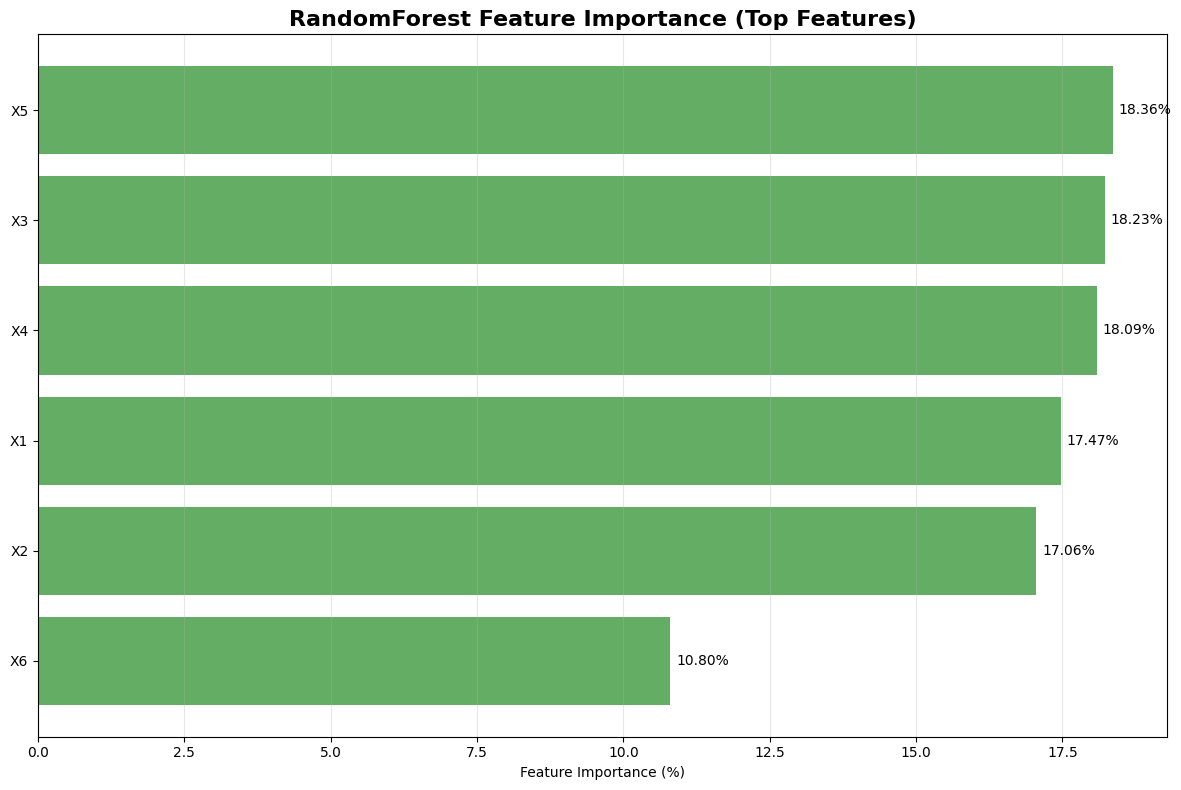

In [84]:
results = optimize_random_forest_pipeline(X, y, test_size=0.2, random_state=42)

Initial analysis identified X5, X3, and X4 as important predictors for customer happiness. To rigorously determine the optimal feature set, we'll implement Recursive Feature Elimination with Cross-Validation (RFECV) using our best-performing Random Forest model.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def train_top_features_rf(X, y, rf_results, top_n=3, feature_names=None, test_size=0.2, random_state=42):
    """
    Trains and evaluates RandomForest using only the top N most important features
    from the previous optimization results
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    rf_results : dict
        Results dictionary from optimize_random_forest_pipeline function
    top_n : int, default=3
        Number of top features to select
    feature_names : list, optional
        Names of features
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    top_results : dict
        Dictionary containing accuracy and feature information for top N features model
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Extract top N most important features from previous results
    feature_importance = rf_results['feature_importance']['importance_scores']
    importance_indices = np.argsort(feature_importance)[::-1]
    
    # Validate top_n parameter
    max_features = len(feature_names)
    if top_n > max_features:
        print(f"Warning: top_n ({top_n}) exceeds available features ({max_features}). Using all features.")
        top_n = max_features
    
    # Get top N feature indices and names
    top_indices = importance_indices[:top_n]
    top_feature_names = [feature_names[i] for i in top_indices]
    top_importance = feature_importance[top_indices]
    top_percentage = (top_importance / top_importance.sum()) * 100
    
    print(f"TOP {top_n} FEATURES RANDOM FOREST TRAINING")
    print("=" * 45)
    print(f"Selected top {top_n} features:")
    for i, (name, pct) in enumerate(zip(top_feature_names, top_percentage)):
        print(f"{i+1}. {name:<15} {pct:6.2f}%")
    
    # Select only top N features from X
    X_top = X[:, top_indices]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_top, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Use the same best parameters from the original optimization
    best_params = rf_results['best_params']
    
    # Extract RandomForest parameters (remove 'classifier__' prefix)
    rf_params = {k.replace('classifier__', ''): v for k, v in best_params.items()}
    
    # Create pipeline with the optimized parameters
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=random_state, **rf_params))
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate training accuracy for comparison
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Print results
    print(f"\nRESULTS:")
    print("-" * 30)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy:  {test_accuracy:.4f}")
    print(f"Overfitting:    {train_accuracy - test_accuracy:.4f}")
    
    # Compare with original model performance
    original_accuracy = rf_results['accuracy']
    accuracy_difference = test_accuracy - original_accuracy
    
    print(f"\nCOMPARISON WITH FULL MODEL:")
    print("-" * 35)
    print(f"Original accuracy (all features): {original_accuracy:.4f}")
    print(f"Top {top_n} accuracy:                   {test_accuracy:.4f}")
    print(f"Difference:                       {accuracy_difference:+.4f}")
    
    if accuracy_difference >= -0.01:  # Less than 1% drop
        print(f"Top {top_n} features maintain similar performance!")
    elif accuracy_difference >= -0.05:  # Less than 5% drop
        print(f"Top {top_n} features show acceptable performance")
    else:
        print(f"Significant performance drop with only top {top_n} features")
    
    # Prepare results
    top_results = {
        'accuracy': test_accuracy,
        'train_accuracy': train_accuracy,
        'overfitting': train_accuracy - test_accuracy,
        'top_features': top_feature_names,
        'top_indices': top_indices,
        'top_importance': top_importance,
        'top_percentage': top_percentage,
        'top_n': top_n,
        'model': pipeline,
        'comparison': {
            'original_accuracy': original_accuracy,
            'accuracy_difference': accuracy_difference,
            'features_reduced': len(feature_names) - top_n
        }
    }
    
    return top_results


In [86]:
top_results = train_top_features_rf(X, y, results, top_n=5, feature_names=None, test_size=0.2, random_state=42)

TOP 5 FEATURES RANDOM FOREST TRAINING
Selected top 5 features:
1. X5               20.59%
2. X3               20.43%
3. X4               20.28%
4. X1               19.58%
5. X2               19.12%

RESULTS:
------------------------------
Train accuracy: 0.8500
Test accuracy:  0.7308
Overfitting:    0.1192

COMPARISON WITH FULL MODEL:
-----------------------------------
Original accuracy (all features): 0.6923
Top 5 accuracy:                   0.7308
Difference:                       +0.0385
Top 5 features maintain similar performance!


Our model analysis indicates that feature X6 ('The app makes ordering easy for me') can be safely removed for the next survey because without it the model gains 0.04 accuracy, precisely reaching 0.73.